In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# cabecera:
# 0: Me identifico,
# 1: Tengo,
# 2: Argentina,
# 3: Años de experiencia,
# 4: Años en el puesto actual,
# 5: ¿Tenés gente a cargo?,
# 6: Nivel de estudios alcanzado,
# 7: Estado,
# 8: Carrera,
# 9: Realizaste cursos de especialización,
# 10: Trabajo de,
# 11: Tecnologías que utilizás,
# 12: Tecnologías que utilizás,
# 13: Tecnologías que utilizás,
# 14: Automation o funcional?,
# 15: Tecnologías que utilizás,
# 16: Tecnologías que utilizás,
# 17: ¿Tenés guardias?,
# 18: Cuánto cobrás por guardia (en tu moneda local),
# 19: "¿Porcentaje, bruto o neto?",
# 20: Tipo de contrato,
# 21: Salario mensual (en tu moneda local),
# 22:¿Bruto o neto?,
# 23: ¿Qué tan conforme estás con tu sueldo?,
# 24: Cómo creés que está tu sueldo con respecto a enero 2018,
# 25: Recibís algún tipo de bono,
# 26: A qué está atado el bono,
# 27: ¿Tuviste ajustes por inflación lo que va del año?,
# 28: ¿De qué % fue el ajuste?,
# 29: Cantidad de empleados,
# 30: ¿Cambiaste de empresa en los últimos 6 meses?,
# 31: ¿Cuál fue el principal motivo de cambio?,
# 32: Beneficios extra
# 33: Carga encuesta de remuneracion

# Columnas para analizar y nombres a utilizar
load_cols = [0,1,3,4,5,10,20,21,22,23]
loaded_cols_names = ['identifica','rango_edad', 'experiencia','tiempo_puesto_actual','gente_a_cargo',
                     'puesto_actual','tipo_contrato','sueldo_mensual','tipo_sueldo','conforme_sueldo']

# Cargamos encuesta
encuesta = pd.read_csv('encuesta_remuneracion_salarial_2018_2_Argentina.csv',
                       header=0,na_values='-',encoding='utf-8', 
                       usecols=load_cols, names=loaded_cols_names)
# ejes = ejes.drop('area',1)[ejes['Participación'].notnull()]

In [307]:
puesto = 'Developer'

def sueldo_neto(row):
    if row['tipo_sueldo'] == 'Bruto':
        return row['sueldo_mensual']
    else:
        return row['sueldo_mensual'] * 0.83

def cat_edades(row):
    if row['rango_edad'] in ['18 - 20','21 - 23']:
        return '18-23'
    elif row['rango_edad'] in ['24 - 26','27 - 30']:
        return '24-30'
    elif row['rango_edad'] in ['31 - 33','34 - 36','37 - 40']:
        return '31-40'
    elif row['rango_edad'] in ['41 - 45','46 - 49','50+']:
        return '41+'
    else:
        return None

def cat_experiencia(row):    
    if row['experiencia'] in ['Menos de un año']:
        return '0 (Menor a un año)'
    elif row['experiencia'] in ['1','2','3']:
        return '1-3'
    elif row['experiencia'] in ['4','5','6']:
        return '4-6'
    elif row['experiencia'] in ['7','8','9','10+']:
        return '7+'
    else:
        return None

def cat_puesto(row):
    if row['puesto_actual'] in ['Developer',
                         'SysAdmin / DevOps',
                         'PM',
                         'Architect',
                         'HelpDesk','QA / Tester',
                         'Designer',
                         'Infosec',
                         'DBA','Recruiter / HR']:
        return row['puesto_actual']
    else:
        return 'Otros'
    
encuesta['sueldo_neto'] = encuesta.apply(sueldo_neto, axis=1)
encuesta['cat_edades'] = encuesta.apply(cat_edades, axis=1)
encuesta['cat_experiencia'] = encuesta.apply(cat_experiencia, axis=1)
encuesta['cat_puesto'] = encuesta.apply(cat_puesto, axis=1)
encuesta['lidera'] = np.where(encuesta['gente_a_cargo']>0, True, False)

encuesta_solo_puesto = encuesta[(encuesta['puesto_actual'] == puesto)]

In [219]:
def pie_chart_total_vs_puesto(encuesta, columna, puesto, graph_title, title_total, title_puesto):
    fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10,5))

    encuesta[columna].value_counts().plot.pie(autopct='%.2f', ax=ax, title=title_total)
    encuesta[(encuesta['puesto_actual'] == puesto)][columna].value_counts().plot.pie(autopct='%.2f', ax=ax2, title=title_puesto)
    ax.set(ylabel='')
    plt.suptitle(graph_title, fontsize=16)
    plt.show()

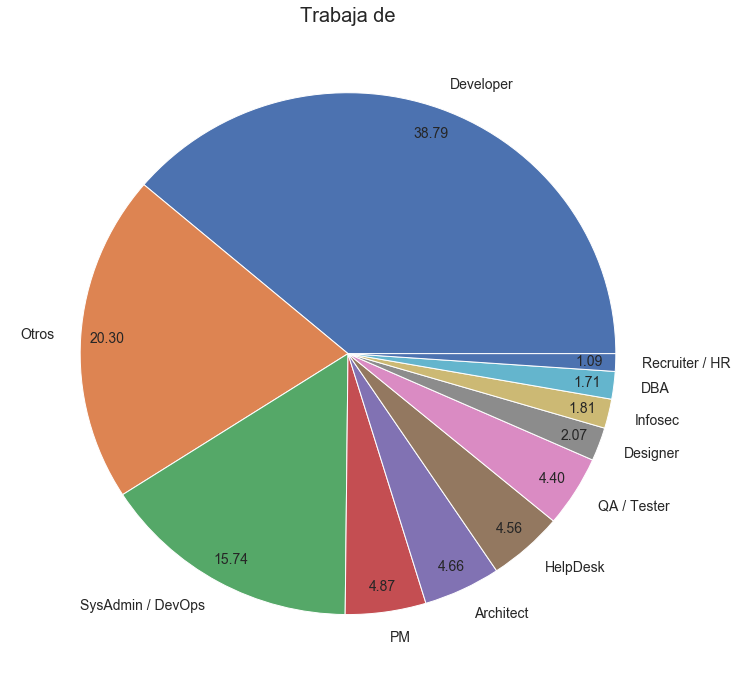

In [265]:
ax = encuesta['cat_puesto'].value_counts().plot.pie(autopct='%.2f', pctdistance=.9, fontsize=14, title="Trabaja de",figsize=(12,12))
ax.title.set_size(20)
ax.set(ylabel='')
plt.show()

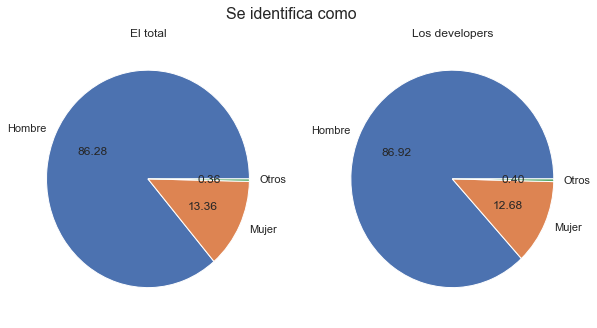

In [221]:
# Como se perciben los respondientes vs los que son developer

pie_chart_total_vs_puesto(encuesta, 
                          "identifica",
                          puesto,
                          "Se identifica como", 
                          "El total", 
                          "Los {0}s".format(puesto.lower()))


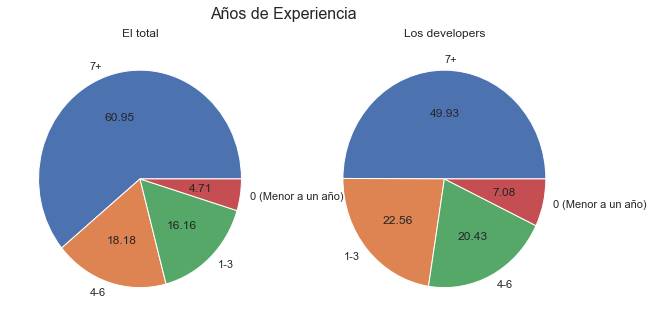

In [222]:
# Años de experiencia de los respondientes vs los que son developer

pie_chart_total_vs_puesto(encuesta, 
                          "cat_experiencia",
                          puesto,
                          "Años de Experiencia", 
                          "El total", 
                          "Los {0}s".format(puesto.lower()))


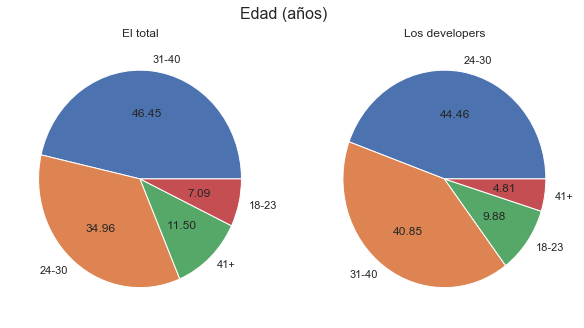

In [225]:
pie_chart_total_vs_puesto(encuesta, 
                          "cat_edades",
                          puesto,
                          "Edad (años)", 
                          "El total", 
                          "Los {0}s".format(puesto.lower()))


In [286]:
ct = pd.crosstab(encuesta["identifica"], 
                 encuesta["cat_experiencia"])
for col in ct.columns:
    print(col)
# print(ct.columns)

0 (Menor a un año)
1-3
4-6
7+


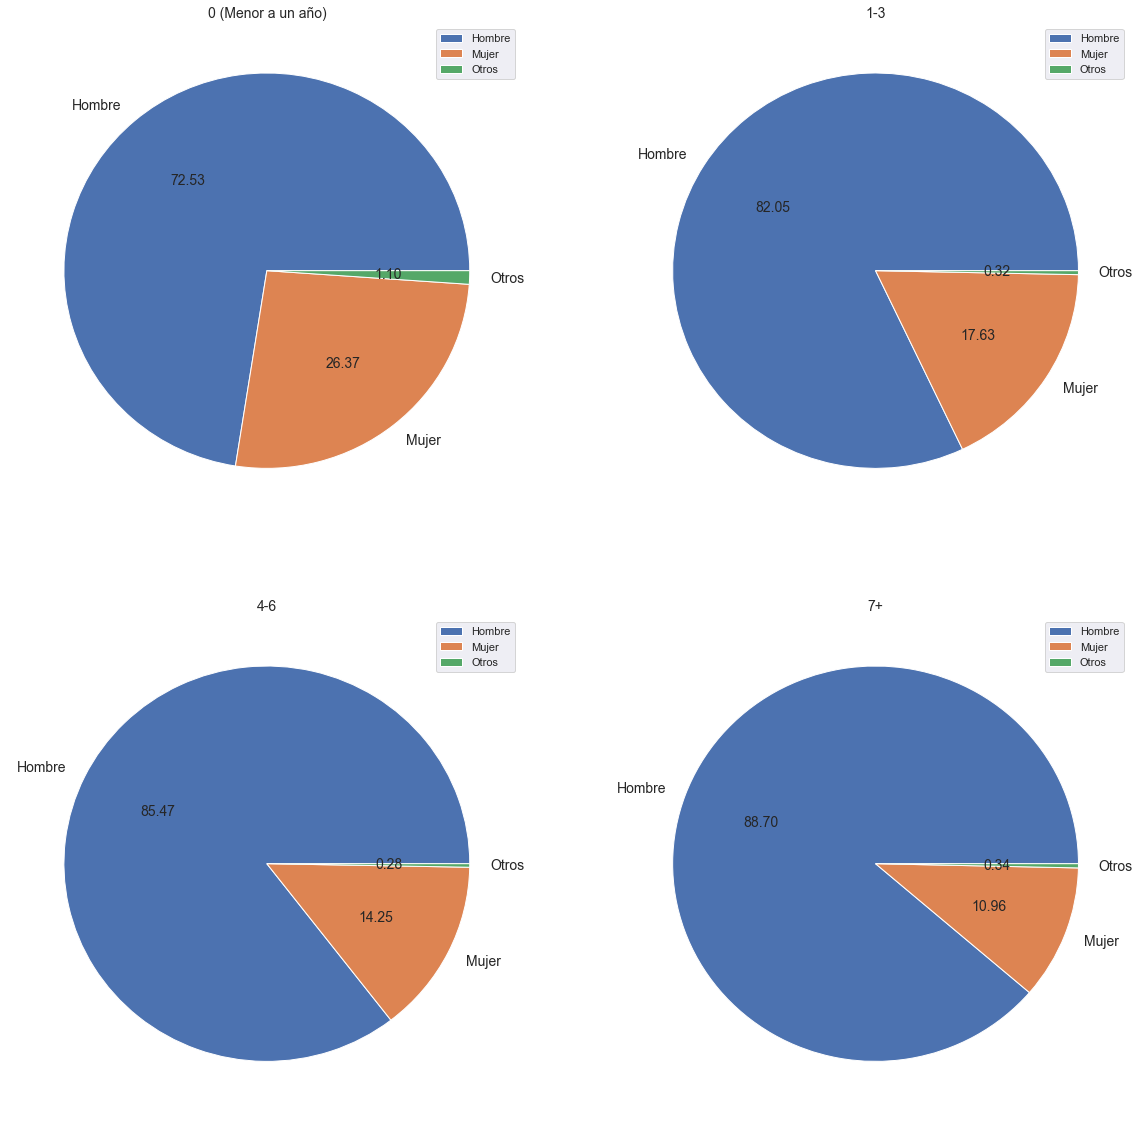

In [288]:
def pie_chart_crosstab(data, index_name, column):
   
    crosstab = pd.crosstab(data[index_name], data[column])
    axes = crosstab.plot.pie(subplots=True,sort_columns =True, fontsize=14,
                             autopct='%.2f', layout=(2,2),
                             figsize=(20, 20))
    # TODO Revisar loop
    t = 0
    for i in range(0,2):
        for j in range(0,2):
            col_name = crosstab.columns[t]
            axes[i][j].set_title(col_name)
            axes[i][j].title.set_size(14)
            axes[i][j].set(ylabel='')
            t = t + 1
    
    plt.show()

    

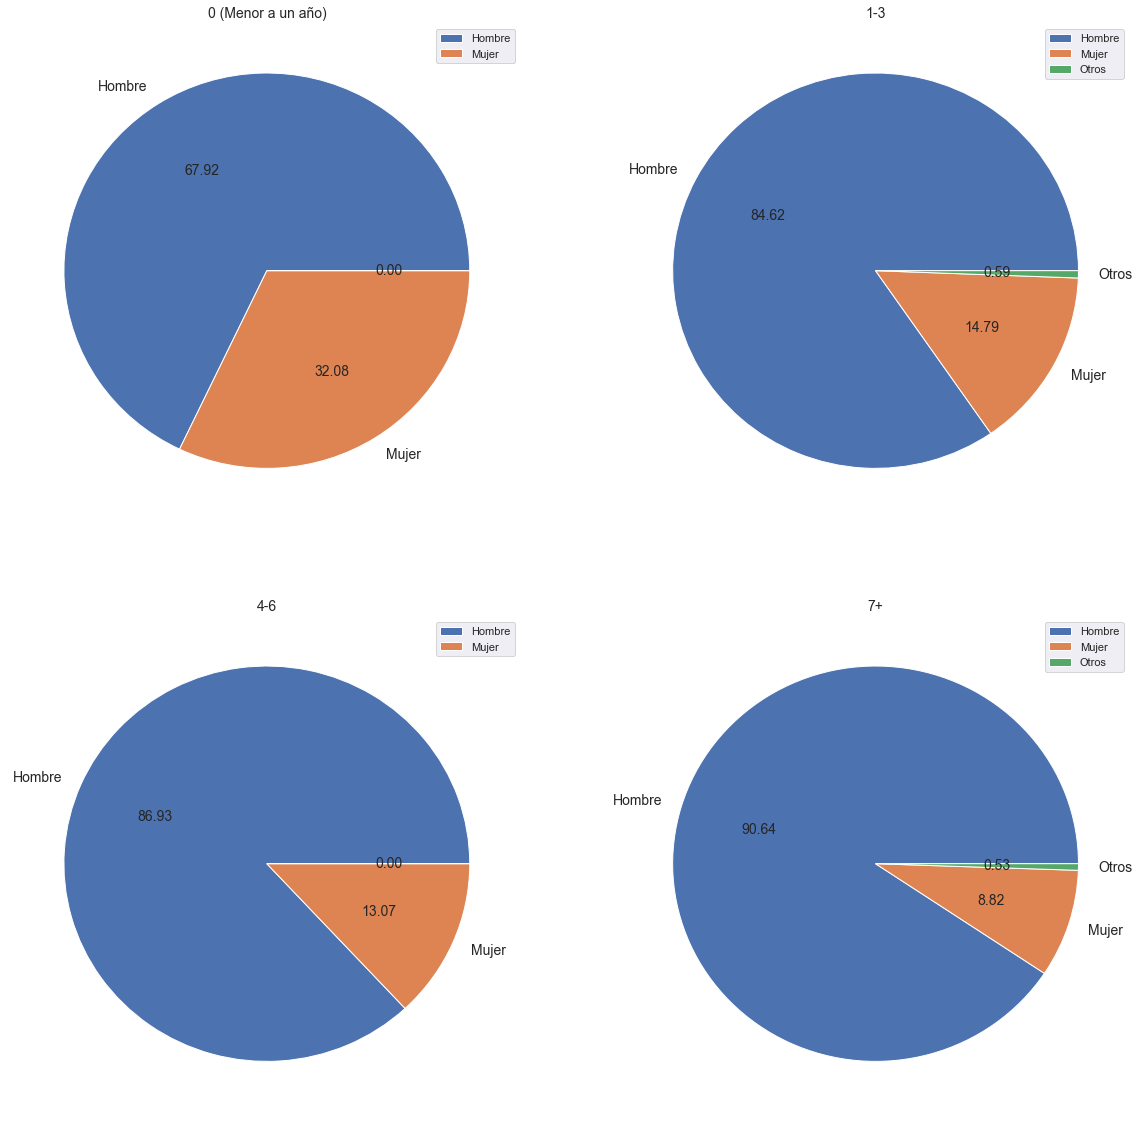

In [308]:
pie_chart_crosstab(encuesta_solo_puesto, "identifica", "cat_experiencia")


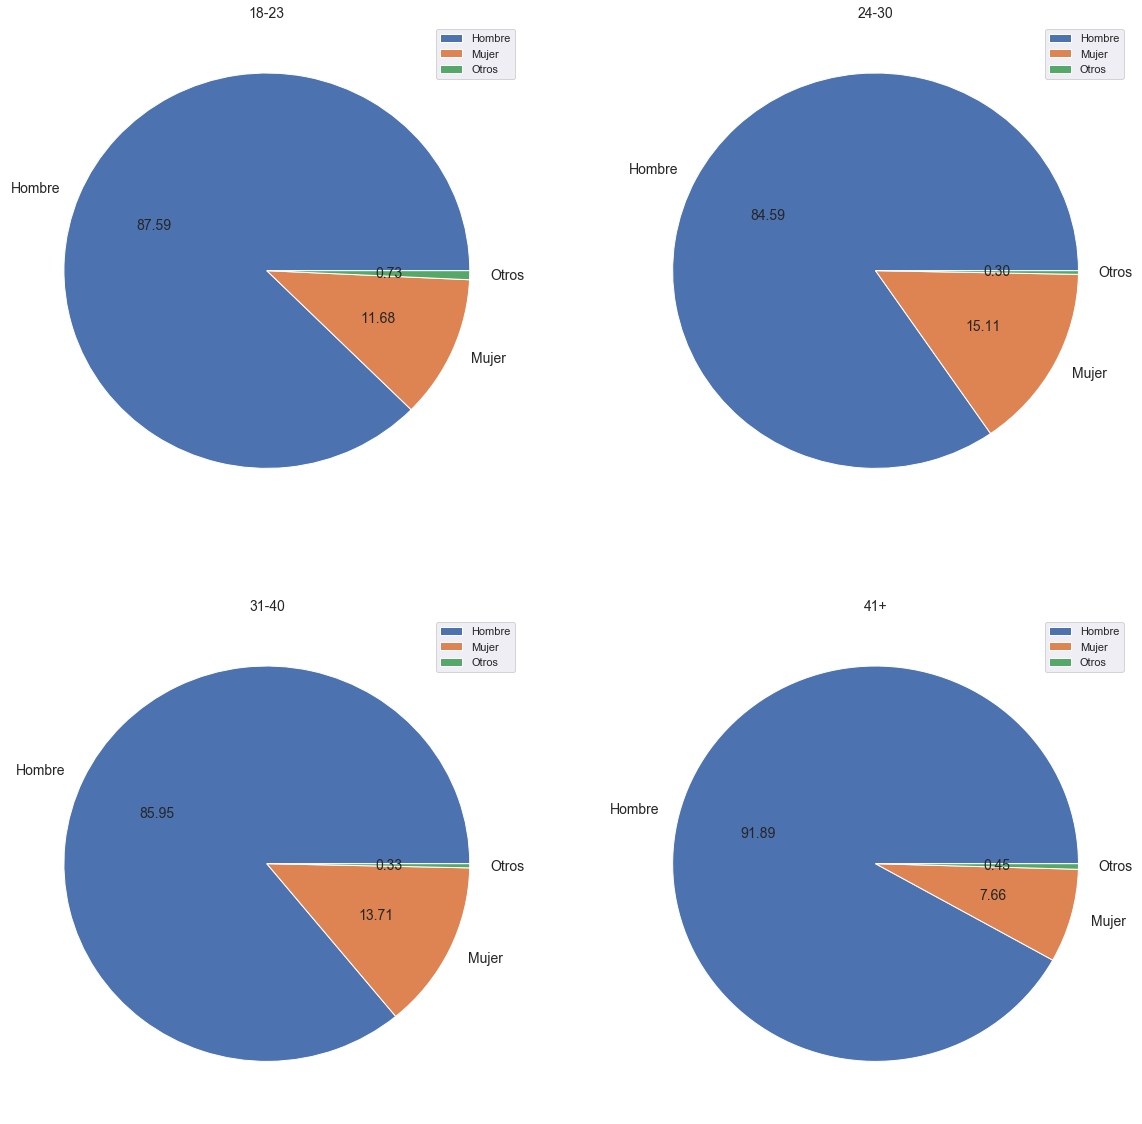

In [309]:
pie_chart_crosstab(encuesta, "identifica", "cat_edades")

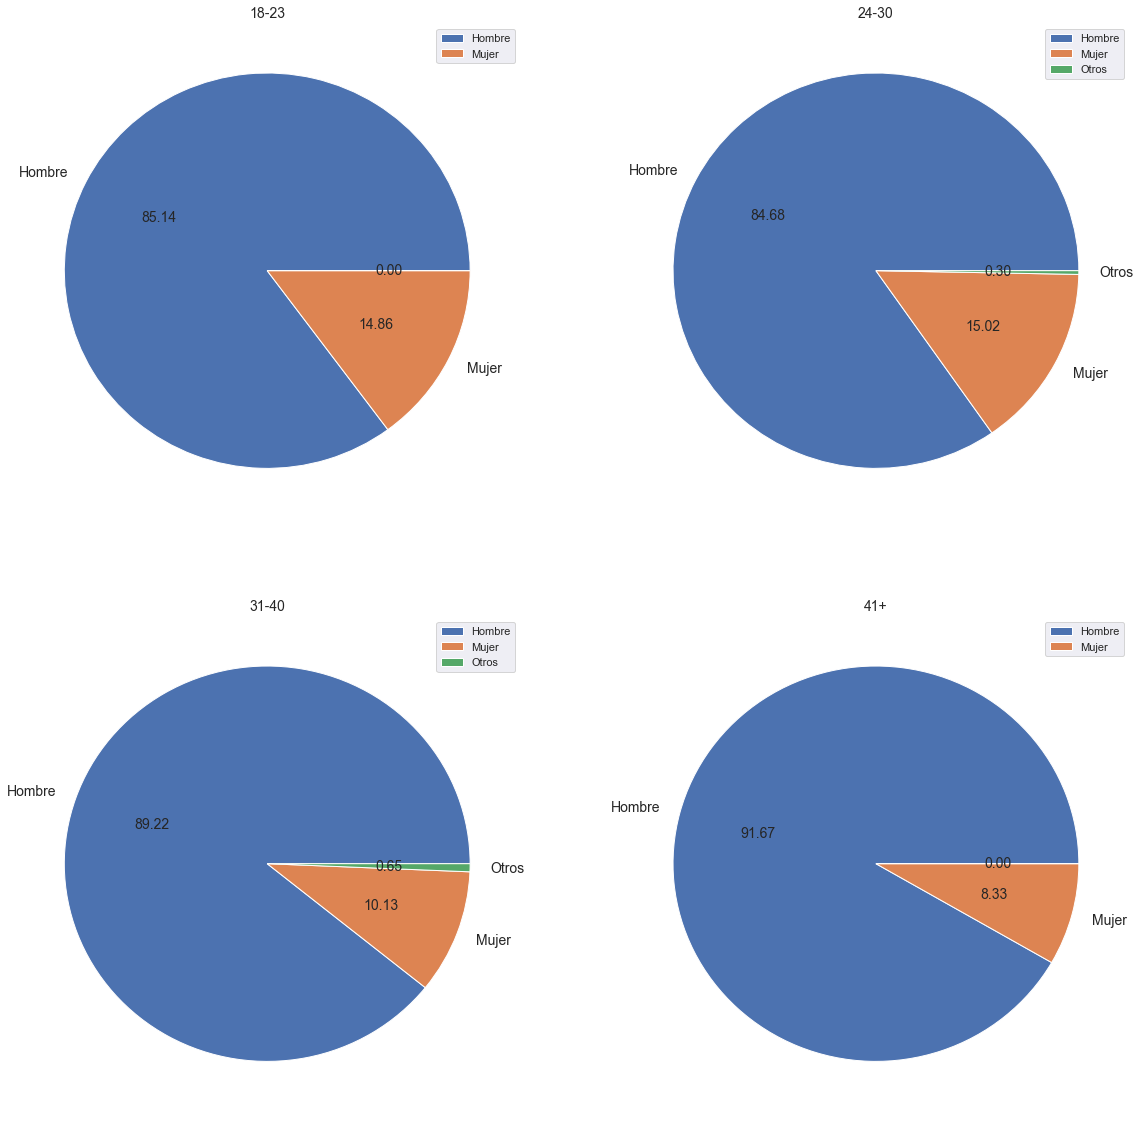

In [310]:
pie_chart_crosstab(encuesta_solo_puesto, "identifica", "cat_edades")

In [317]:
encuesta_solo_puesto['sueldo_neto'].describe([.01,.02,0.03,.04,.05,0.1,.25,.5,.75,.9,.95,.98,.99])


count       749.000000
mean      42285.971541
std       38829.684983
min          10.052130
1%           24.948000
2%          132.576000
3%         7928.160000
4%         9960.000000
5%        12450.000000
10%       16162.590000
25%       22410.000000
50%       32500.000000
75%       49100.000000
90%       76400.000000
95%      105000.000000
98%      140000.000000
99%      183510.000000
max      600000.000000
Name: sueldo_neto, dtype: float64

In [318]:
# Filtro lo que interesa ver en lo violin plots
plot_df = encuesta[(encuesta['puesto_actual'] == puesto) & 
                   (encuesta['identifica'] != 'Otros') & 
                   (encuesta_puesto_sin_otros['sueldo_neto'] < 200000) &
                   (encuesta_puesto_sin_otros['sueldo_neto'] > 150)]

# Orden a usar en los ejes x
exp_order = ["0 (Menor a un año)", "1-3", "4-6","7+"]
edad_order = ["18-23","24-30","31-40","41+"]

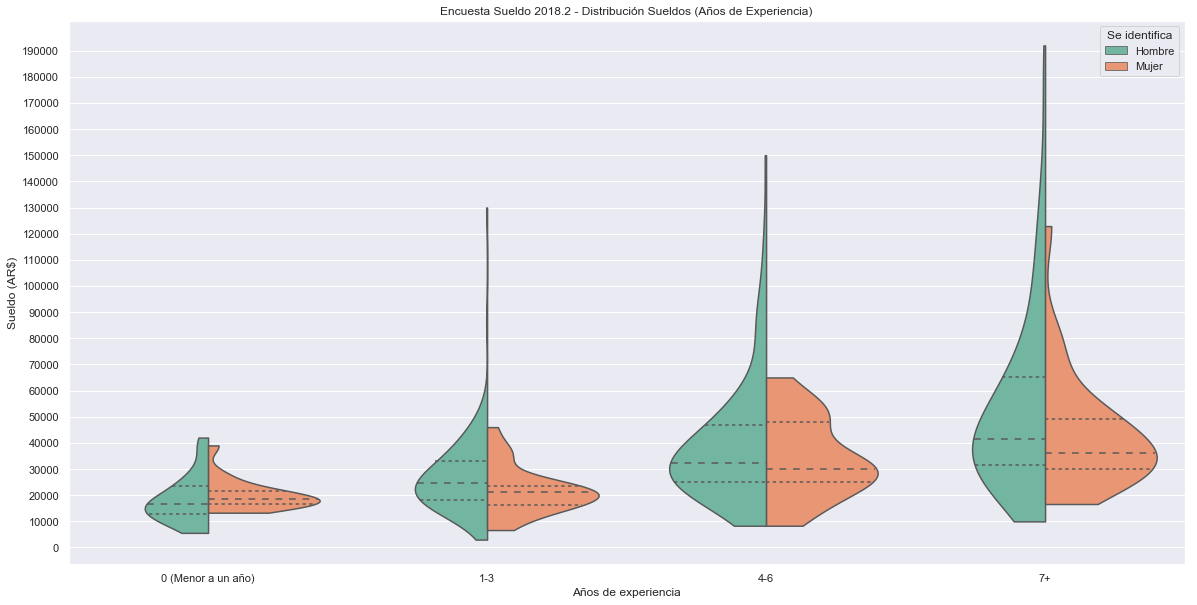

In [319]:
sns.set()

fig = plt.figure(figsize=(20,10))
ax = sns.violinplot(x="cat_experiencia", y="sueldo_neto", hue="identifica", order=exp_order,
                     data=plot_df, palette="Set2",inner='quartile', scale='area', bw=.5, cut=0, split=True)

ax.set_yticks(range(0, 200000, 10000))

ax.set_xlabel('Años de experiencia')
ax.set_ylabel('Sueldo (AR$)')
l = ax.legend()
l.set_title('Se identifica')
ax.set_title('Encuesta Sueldo 2018.2 - Distribución Sueldos (Años de Experiencia)')
plt.show()

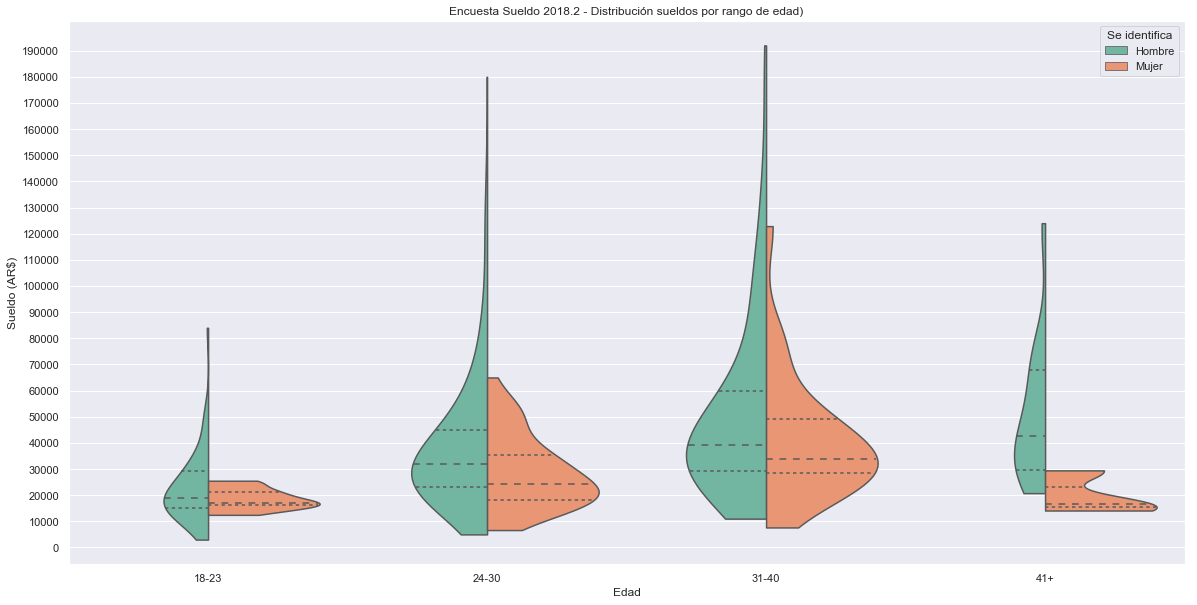

In [320]:
sns.set()

fig = plt.figure(figsize=(20,10))
# exp_order = ["Menos de un año", "1", "2", "3", "4", "5","6","7","8","9","10+"]
ax = sns.violinplot(x="cat_edades", y="sueldo_neto", hue="identifica", order=edad_order,
                     data=plot_df, palette="Set2", cut=0,inner='quartile',  scale='area', bw=.5, split=True)

ax.set_yticks(range(0, 200000, 10000))
ax.set_xlabel('Edad')
ax.set_ylabel('Sueldo (AR$)')
l = ax.legend()
l.set_title('Se identifica')
ax.set_title('Encuesta Sueldo 2018.2 - Distribución sueldos por rango de edad)')

plt.show()